In [102]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

EXP_NAME = "logs/clients"
RESULTS_DIR = os.path.join( os.getcwd(),'results')

headers = ['time', 'start_transfer', 'download','status','size']

#Read input files from the directory and returns DataTable object in a combined list
def read_clients():
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR, f))]    
    proxy_data = pd.read_csv(os.path.join('clients.csv'),sep=',')
    #Load results from each node
    nodes_results = None
    for sub_dir in dirs:
        client_nodes = [f for f in os.listdir(INPUT_DIR+'/'+sub_dir) if os.path.isdir(os.path.join(INPUT_DIR+'/'+sub_dir, f))]
        #print(client_nodes)
        for node in client_nodes:
            tunnel_nodes = os.listdir(INPUT_DIR+'/'+sub_dir+'/'+node)
            for tunnel in tunnel_nodes:                
                file = os.path.join(INPUT_DIR+'/'+sub_dir+'/'+node,tunnel)
               
                
                
                temp_filter = proxy_data.loc[(proxy_data['proxy'] == int(tunnel)) & (proxy_data['client'] == int(sub_dir))]
                try:
                    temp = pd.read_csv(file,sep=',', header = None)
                    temp.columns = headers
                    temp = temp.query('status == 200 & size >0')
                    #temp = temp.set_index(pd.DatetimeIndex(temp.time))
                    temp['proxy'] = tunnel
                    temp['client'] = sub_dir
                    temp['distance'] = temp_filter.distance.iloc[0]
                    temp['hops'] = temp_filter.hops.iloc[0]
                    temp['download_time'] = temp['download'] - temp['start_transfer']
                                                           
                    nodes_results = pd.concat([nodes_results, temp])
                except Exception as e:
                    print(node, 'EXception', e)
    return nodes_results

client_data = read_clients()
#for client in client_data:
#    df = client_data[client]
#    df['download_time']= df['download'] - df['start_transfer']
#    proxies = df.proxy.unique()
#    for proxy in proxies:
#        df_proxy = df.query('proxy == "'+proxy+'"')
#        print(client,':',proxy,':',df_proxy['size'].mean(),':',df_proxy.download_time.mean())
    

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

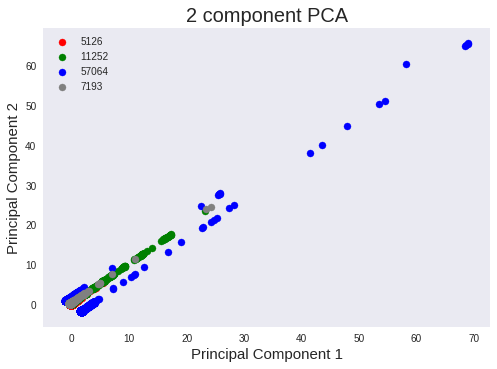

In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
    
def plot_pca(df ):
    #df.reset_index()
    features = ['distance','start_transfer']
    x = df.loc[:, features].values
    y = df.loc[:,['proxy']].values
    x = StandardScaler().fit_transform(x)
    
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca1', 'pca2']) 
    principalDf = principalDf.assign(proxy=df['proxy'].values)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = ['5126', '11252', '57064','7193']
    colors = ['r', 'g', 'b','Gray']
    for target, color in zip(targets,colors):
        #if target == '7193':
        indicesToKeep = principalDf['proxy'] == target
        plt.scatter(principalDf.loc[indicesToKeep, 'pca1']
                   , principalDf.loc[indicesToKeep, 'pca2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()
    plt.show()
    
plot_pca(client_data)
   